# CMPS 3160 Final Project  
### By: Ryan Stevens, Alex Olteanu  
#### GitHub: https://github.com/stevensryanw/stevensryanw.github.io

### Introduction  

In this project we will be creating our own datasets through merging datasets from multiple online sources. The datasets we will be using are from the National Hockey League (NHL), National Basketball Association (NBA), and the National Football League (NFL). For each league we have created a dataset that contains the statistics of each player in the league, and a dataset that contains the salaries of each player in the league. We will be using these datasets to create a model that will predict the salary of a player based on their statistics. In adition to this, we will be using the datasets to create a model that will predict the salary of a player based on the statistics of the players on their team. Another question we will be answering is which league has the highest average salary. Additionally, we will be answering the question of which league has the highest average salary for a player based on their position. 

We would also like to create multiple heat maps and graphs showing the correlation between salary and location. I would like to find if any location has higher salaries in any of the leagues. I would also like to find if any location has higher salaries for a specific position in any of the leagues. Moreover, since our data sets are currently so large this poses a very interesting question of what is the best way to tackle all of this information. Given the dozens of measures available to describe an athlete statistically, this means that there is a fairly large combination of different metrics and their correlation. We believe that we will first have to investing our most promising leads, as well as any hunches we may feel inclined to act on. Thankfully, using Pandas we are able to compare vast numbers of variables at a glance so this is one route we are willing to entertain. The leads were are searching for however, to be specific, are any relationships that may help us answer the question mentioned above. 

In [67]:
#Importing numpy and pandas
import numpy as np
import pandas as pd
#Importing matplotlib and seaborn
#import matplotlib.pyplot as plt
#import seaborn as sns

## Data Initialization

### NHL Data Initializations

In [68]:
#Creating a dataframe from csv files
#This is the data of the 2011-2021 nhl skaters
nhl2011 = pd.read_csv('data/nhl/skater_data/skaters2011.csv')
nhl2012 = pd.read_csv('data/nhl/skater_data/skaters2012.csv')
nhl2013 = pd.read_csv('data/nhl/skater_data/skaters2013.csv')
nhl2014 = pd.read_csv('data/nhl/skater_data/skaters2014.csv')
nhl2015 = pd.read_csv('data/nhl/skater_data/skaters2015.csv')
nhl2016 = pd.read_csv('data/nhl/skater_data/skaters2016.csv')
nhl2017 = pd.read_csv('data/nhl/skater_data/skaters2017.csv')
nhl2018 = pd.read_csv('data/nhl/skater_data/skaters2018.csv')
nhl2019 = pd.read_csv('data/nhl/skater_data/skaters2019.csv')
nhl2020 = pd.read_csv('data/nhl/skater_data/skaters2020.csv')
nhl2021 = pd.read_csv('data/nhl/skater_data/skaters2021.csv')

#Merging the skater dataframes into one dataframe
nhl = pd.concat([nhl2011, nhl2012, nhl2013, nhl2014, nhl2015, nhl2016, nhl2017, nhl2018, nhl2019, nhl2020, nhl2021], ignore_index=True)

#Removing situations other than all
nhl.drop(nhl[nhl['situation'] != 'all'].index, inplace=True)
nhl.drop(nhl[nhl['season'] == '2022'].index, inplace=True)

#Output the dataframe
nhl


,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
1,8470144,2011,Frans Nielsen,NYI,C,all,82,85867.0,1837.0,43.42,...,157.72,169.69,3090.0,3536.0,0.0,0.0,0.0,0.0,0.0,0.0
6,8467439,2011,Jaroslav Spacek,CAR,D,all,46,44391.0,1002.0,19.55,...,90.96,99.20,1871.0,2071.0,0.0,0.0,0.0,0.0,0.0,0.0
11,8470724,2011,Kyle Quincey,DET,D,all,72,94434.0,2040.0,37.69,...,118.54,112.66,2621.0,2470.0,0.0,0.0,0.0,0.0,0.0,0.0
16,8475154,2011,Carter Ashton,TOR,R,all,15,9375.0,215.0,-0.90,...,32.69,40.85,594.0,737.0,0.0,0.0,0.0,0.0,0.0,0.0
21,8470324,2011,Josh Gorges,MTL,D,all,82,111324.0,2415.0,22.47,...,143.85,130.20,3092.0,2820.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45761,8475744,2022,Evgeny Kuznetsov,WSH,C,all,1,1301.0,23.0,0.03,...,1.66,2.29,44.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0
45766,8476422,2022,Mike Reilly,BOS,D,all,1,877.0,21.0,0.93,...,2.48,2.07,32.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0
45771,8480803,2022,Evan Bouchard,EDM,D,all,1,997.0,21.0,0.45,...,2.23,2.28,31.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0
45776,8480806,2022,Isac Lundestrom,ANA,C,all,1,915.0,19.0,-0.27,...,2.16,3.73,36.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
#Create a csv of the dataframe
nhl.to_csv('nhl.csv')

### NFL Data Initializations

In [70]:
#Methods for processing data
def cleanYear(data):
    return data[data["Year"]>2006]

def cleanData(data):
    # data = data.rename(columns=({"Player Id":"Pid"})).copy()
    data["Pid"] = data["Player Id"].str.extract('(\d+)', expand=False)
    data = cleanYear(data)
    data.drop(columns=["Player Id"],axis=1,inplace=True)
    return data

def changeName(data):   
    df = pd.DataFrame()
    df = data["Name"]
    for i in df:
        count = 0
        lst = i.split()
        name = ""
        name = name + lst[0] + "," + lst[1]
        data.at[count,"Name"] = name
        count = count + 1
        print(name)
    return data
    
#Initialize salary dataset
nfl_salaries = pd.read_csv("data/nfl/player_salaries/nfl_salary.csv")
nfl_salaries = nfl_salaries.rename(columns={"playerId":"Pid"})
nfl_salaries = nfl_salaries.rename(columns={"playerName":"Name"})

#Initialize "root" stat dataset
nfl_stats_basic = pd.read_csv("data/nfl/stats/Basic_Stats.csv")
nfl_stats_basic = nfl_stats_basic.rename(columns=({"Player Id":"Pid"}))
nfl_stats_basic["Pid"] = nfl_stats_basic["Pid"].str.extract('(\d+)', expand=False)
#display(changeName(nfl_stats_basic))

#Initialize auxilliary stat datasets
nfl_defensive = pd.read_csv("data/nfl/stats/Career_Stats_Defensive.csv")
nfl_field_goal = pd.read_csv("data/nfl/stats/Career_Stats_Field_Goal_Kickers.csv")
nfl_fumble = pd.read_csv("data/nfl/stats/Career_Stats_Fumbles.csv")
nfl_kick_return = pd.read_csv("data/nfl/stats/Career_Stats_Kick_Return.csv")
nfl_kickoff = pd.read_csv("data/nfl/stats/Career_Stats_Kickoff.csv")
nfl_passing = pd.read_csv("data/nfl/stats/Career_Stats_Passing.csv")
nfl_punt_return = pd.read_csv("data/nfl/stats/Career_Stats_Punt_Return.csv")
nfl_punting = pd.read_csv("data/nfl/stats/Career_Stats_Punting.csv")
nfl_receiving = pd.read_csv("data/nfl/stats/Career_Stats_Receiving.csv")
nfl_rushing = pd.read_csv("data/nfl/stats/Career_Stats_Rushing.csv")

csvList = [nfl_defensive, nfl_field_goal, nfl_fumble, nfl_kick_return, nfl_kickoff, nfl_passing, nfl_punt_return, nfl_punting, nfl_receiving, nfl_rushing,]

for i in csvList:
   i = cleanData(i)

for i in csvList:
    i.drop(columns=["Player Id"],axis=1,inplace=True)

/var/folders/p9/4mptvc4s1rv0cjswq6p3tlzh0000gn/T/ipykernel_58348/3298463034.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["Player Id"],axis=1,inplace=True)
/var/folders/p9/4mptvc4s1rv0cjswq6p3tlzh0000gn/T/ipykernel_58348/3298463034.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["Player Id"],axis=1,inplace=True)
/var/folders/p9/4mptvc4s1rv0cjswq6p3tlzh0000gn/T/ipykernel_58348/3298463034.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [81]:
#What data to create
# nfl_defense(nfl_defensive)
# nfl_offense(nfl_passing, nfl_rushing, nfl_receiving, nfl_fumble, , nfl_kick_return, nfl_punt_return, nfl_kickoff, nfl_punting, nfl_field_goal)

#Further data processing
dList = [nfl_defensive]
oList = [nfl_receiving, nfl_rushing, nfl_fumble, nfl_kick_return, nfl_punt_return, nfl_kickoff, nfl_field_goal, nfl_punting]

#Creating nfl_defense
nfl_defense = nfl_defensive

#Creating nfl_offense
nfl_offense = nfl_passing
for i in oList:
    nfl_offense = pd.merge(nfl_offense, i, on=['Pid', 'Year', 'Name', 'Position', 'Team', 'Games Played'], how="left")

#Output the dataframe and create a csv
nfl_offense.to_csv('nfl_offense.csv')
nfl_offense

/var/folders/p9/4mptvc4s1rv0cjswq6p3tlzh0000gn/T/ipykernel_58348/1921517637.py:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Fumbles_x'} in the result is deprecated and will raise a MergeError in a future version.
  nfl_offense = pd.merge(nfl_offense, i, on=['Pid', 'Year', 'Name', 'Position', 'Team', 'Games Played'], how="left")


,Name,Position,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,...,Net Punting Average,Punts Blocked,Out of Bounds Punts,Downed Punts,Punts Inside 20 Yard Line,Touchbacks,Fair Catches,Punts Returned,Yards Returned on Punts,TDs Returned on Punt
0,"Farris, Tom",NaN,1948,Chicago Rockets,0,--,--,--,0.0,--,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Farris, Tom",NaN,1947,Chicago Bears,9,2,0,0.0,0.2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Farris, Tom",NaN,1946,Chicago Bears,11,21,8,38.1,1.9,108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Demory, Bill",NaN,1974,New York Jets,1,--,--,--,0.0,--,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Demory, Bill",NaN,1973,New York Jets,6,39,12,30.8,6.5,159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8520,"Anderson, Bill",NaN,1962,Washington Redskins,12,--,--,--,0.0,--,...,--,0,--,--,--,--,--,--,--,--
8521,"Anderson, Bill",NaN,1961,Washington Redskins,14,--,--,--,0.0,--,...,--,--,--,--,--,--,--,--,--,--
8522,"Anderson, Bill",NaN,1960,Washington Redskins,12,--,--,--,0.0,--,...,--,--,--,--,--,--,--,--,--,--
8523,"Anderson, Bill",NaN,1959,Washington Redskins,11,--,--,--,0.0,--,...,--,--,--,--,--,--,--,--,--,--


In [80]:
#Output the dataframe and create a csv
nfl_defense.to_csv('nfl_defense.csv')
nfl_defense

,Name,Position,Year,Team,Games Played,Total Tackles,Solo Tackles,Assisted Tackles,Sacks,Safties,Passes Defended,Ints,Ints for TDs,Int Yards,Yards Per Int,Longest Int Return,Pid
0,"Johnson, Quinn",NaN,2013,Tennessee Titans,4,0,--,--,--,--,--,--,--,--,0.0,--,79593
1,"Johnson, Quinn",NaN,2012,Tennessee Titans,16,1,1,0,0.0,--,0,--,--,--,0.0,--,79593
2,"Johnson, Quinn",NaN,2011,Tennessee Titans,4,0,--,--,--,--,--,--,--,--,0.0,--,79593
3,"Johnson, Quinn",NaN,2011,Denver Broncos,0,0,--,--,--,--,--,--,--,--,0.0,--,79593
4,"Johnson, Quinn",NaN,2010,Green Bay Packers,11,4,4,0,0.0,--,0,--,--,--,0.0,--,79593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,"Smith, Torrey",WR,2012,Baltimore Ravens,16,1,1,0,0.0,0,0,--,--,--,0.0,--,2495459
23994,"Smith, Torrey",WR,2011,Baltimore Ravens,16,2,2,0,0.0,0,0,--,--,--,0.0,--,2495459
23995,"Folsom, J.D.",NaN,2009,Miami Dolphins,2,1,1,0,0.0,--,0,--,--,--,0.0,--,238485
23996,"Reader, Jamie",NaN,2001,Philadelphia Eagles,16,7,7,0,0.0,--,0,--,--,--,0.0,--,2502599


#### Possible Merge for later

In [73]:
#Merging nfl_defense with nfl_salaries
#nfl_salaries.drop(columns=["playerId", "team", "salary", "signingBonus", "rosterBonus", "workoutBonus", "restructureBonus", "optionBonus", "incentive"], inplace=True)
#nfl_salaries.rename(columns={"playerName":"Name", "year":"Year"}, inplace=True)
#nfl_defense = pd.merge(nfl_defense, nfl_salaries, on=['Name', 'Year',], how="left")

#Merging nfl_offense with nfl_salaries
#nfl_offense = pd.merge(nfl_offense, nfl_salaries, on=['Name', 'Year',], how="left")

dataSets = [nfl_salaries, nfl_stats_basic, nfl_defense, nfl_offense]
#for i in dataSets:
#    display(i)

### NBA Data Initializations

In [74]:
#Creating dataframes from the csv files

#This is the data of 2000-2020 nba player salaries
nba_salaries = pd.read_csv('data/nba/player_salaries/nba-salaries.csv')

#This is the data of 2000-2020 nba player stats
nba_season = pd.read_csv('data/nba/stats/nba_season.csv')

#In order to merge nba_salaries and nba_season we need to change the Player column in nba_season to name in order to match the column name in nba_salaries, also need to do this for the year column
nba_season.rename(columns = {'Player':'name'}, inplace = True)
nba_season.rename(columns = {'Year':'season'}, inplace = True)

#Clean out the years after 2017
def cleanYear(data):
    return data[data['season']<=2017]

#Now we can merge the two dataframes using the name and season column
nba = pd.merge(nba_salaries, nba_season, how='left', left_on=['name','season'], right_on = ['name','season'])
nba = cleanYear(nba)
#nba = nba.drop(columns=['Unnamed: 0'])

#Output the dataframe
nba

,rank,name,position,team,salary,season,Unnamed: 0,Pos,Age,Tm,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Shaquille O'Neal,C,Los Angeles Lakers,17142000,2000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Kevin Garnett,PF,Minnesota Timberwolves,16806000,2000,14632.0,PF,23.0,MIN,...,0.765,223.0,733.0,956.0,401.0,120.0,126.0,268.0,205.0,1857.0
2,3,Alonzo Mourning,C,Miami Heat,15004000,2000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Juwan Howard,PF,Washington Wizards,15000000,2000,14678.0,PF,26.0,WAS,...,0.735,132.0,338.0,470.0,247.0,67.0,21.0,225.0,299.0,1220.0
4,5,Scottie Pippen,SF,Portland Trail Blazers,14795000,2000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9427,592,Quinn Cook,PG,Dallas Mavericks,15984,2017,24205.0,PG,23.0,NOP,...,0.667,1.0,3.0,4.0,14.0,3.0,0.0,5.0,7.0,52.0
9428,593,Axel Toupane,SG,Milwaukee Bucks,15435,2017,24622.0,SF,24.0,TOT,...,NaN,0.0,1.0,1.0,0.0,1.0,1.0,0.0,6.0,11.0
9429,593,Axel Toupane,SG,Milwaukee Bucks,15435,2017,24623.0,SF,24.0,MIL,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9430,593,Axel Toupane,SG,Milwaukee Bucks,15435,2017,24624.0,SF,24.0,NOP,...,NaN,0.0,1.0,1.0,0.0,1.0,1.0,0.0,5.0,11.0


In [75]:
#Create a csv of the dataframe
nba.to_csv('nba.csv')

## Data Use Examples For Each League And Dataset

### NHL

In [76]:
#Graphing the nhl data

### NFL

<AxesSubplot:title={'center':'Yards Per Int vs Games Played'}, xlabel='Games Played', ylabel='Yards Per Int'>

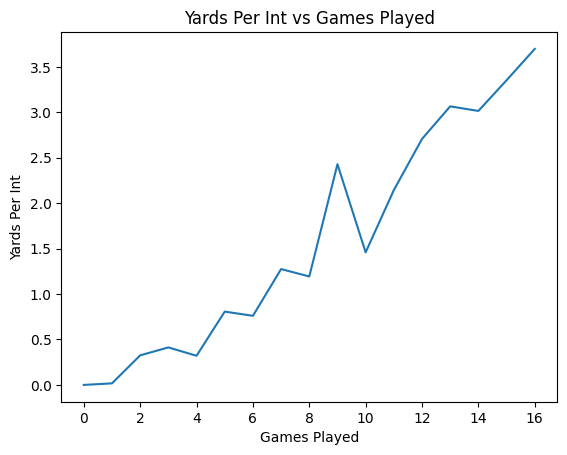

In [82]:
#Aggregating the mean based on games played
nfl_grouped = nfl_defense.groupby('Games Played').mean()
nfl_grouped

#Graphing the aggregated data of with respect to yards covered
nfl_grouped['Yards Per Int'].plot.line(
    title='Yards Per Int vs Games Played',
    xlabel='Games Played',
    ylabel='Yards Per Int',
)

### NBA

<AxesSubplot:xlabel='season'>

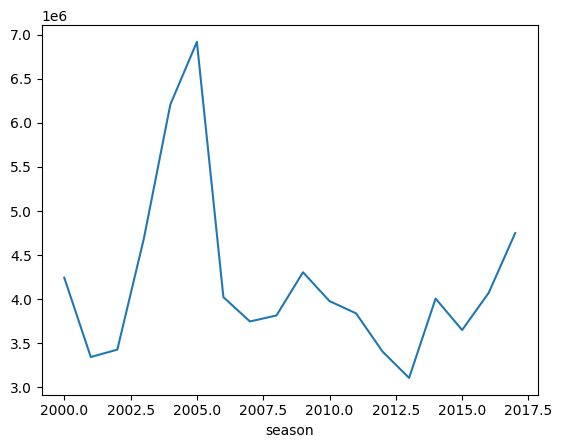

In [83]:
#Aggregating the mean based on season
nba_salEval = nba.groupby('season').mean()
nba_salEval

#Graphing the aggregated data of just the salary column
nba_salEval['salary'].plot.line()

This graph shows how NBA salaries paeked in 2005 and are back on an uptrend as of 2012. This is likely due to the NBA lockout in 2011.